# Political Tweets Analysis

## Introduction

Can we predict if a political tweet has a Democrat or Republican inclination? Can we know the overall sentiment of the online-speech coming from Democrats and Republicans in digital communities?

Welcome to this Jupyter Notebook dedicated to the analysis of political tweets! In this project, we delve into the fascinating world of political discourse on social media. Our goal is to gain insights into the dynamics of political discussions by analyzing a dataset of tweets.

### Data Overview

The dataset is comprised of political tweets, encompassing a variety of topics and sentiments. Throughout this analysis, we perform Exploratory Data Analysis (EDA) and engage in Feature Engineering to extract valuable information. Notably, a "retweets" column is introduced to binary code tweets that are retweets, and hashtags are systematically extracted and categorized into Democrat and Republican lists. These hashtags are consolidated in a "Hashtags" column, providing a quick reference for each tweet's associated hashtags. Additionally, the "Party" column is binarized to facilitate classification tasks.
Republican.

### Sentiment Analysis

An analysis will be conducted to assess the overall sentiment of public discourse from Democrat and Republican senators on digital platforms. A histogram will be generated to compare the overall sentiment in tweets from members of both parties. Additionally, an investigation into the top words will be carried out to identify positive and negative discourse in tweets from senators belonging to each party.

### Hypothesis Testing

By subjecting the sentiment analysis results to a hypothesis test, we aim to ensure the robustness of the conclusions, providing a solid foundation for interpreting and communicating the nuanced sentiment differences between Democrats and Republicans in a statistically sound manner.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Load DataFrame into variable df
df_cleaned = pd.read_csv('CleanedRepublicanVsDemocrat.csv')
df_cleaned.head()

,user_id,tweet,party,is_retweet,is_democrat,hashtags,clean_tweet
0,76452765,"On Joe Biden's first day in the Oval Office, h...",R,0,0,NaN,joe biden first day oval office signed legisla...
1,76452765,I was sorry to hear of the passing of longtime...,R,0,0,NaN,sorry hear passing longtime caregiver leo lion...
2,76452765,RT @1819News: U.S. Rep. Robert Aderholt (R-Hal...,R,1,0,NaN,rep robert aderholt haleyville recently took h...
3,76452765,I’m sorry to hear of Anthony’s passing. He fre...,R,0,0,NaN,sorry hear anthony passing frequently interact...
4,76452765,H.R. 6914 Pregnant Students’ Rights Act: Colle...,R,0,0,NaN,h 6914 pregnant student right act college univ...


## 4. Sentiment Analysis

In [3]:
# Text Blob
!pip install textblob


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from textblob import TextBlob
from textblob import Word

In [5]:
# Computes the sentiment polarity and subjectivity of the first 5 tweets in the 'clean_tweet' column of the DataFrame.
# Returns a series of sentiment polarity and subjectivity values for the first 5 tweets.

def polarity_subjectivity(df):
    return df['clean_tweet'][:5].apply(lambda x: TextBlob(x).sentiment)

#
result = polarity_subjectivity(df_cleaned)

# Print the results
print(result)

0                   (0.10416666666666667, 0.375)
1    (-0.16666666666666666, 0.35555555555555557)
2      (0.06818181818181818, 0.3522727272727273)
3      (0.13333333333333333, 0.6833333333333332)
4      (0.15476190476190477, 0.5089285714285714)
Name: clean_tweet, dtype: object


We can can see that it returns a tuple representing polarity and subjectivity of each tweet. Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. This can also work as a feature for building a machine learning model.

In [6]:
# Analyzes the sentiment of tweets in the 'clean_tweet' column using TextBlob sentiment analysis.
def sentiment_analysis(df):
    df['sentiment'] = df['clean_tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
    return df[['clean_tweet','sentiment']]

# Run function into a variable
sentiment = sentiment_analysis(df_cleaned)

In [7]:
df_cleaned.head(5)

,user_id,tweet,party,is_retweet,is_democrat,hashtags,clean_tweet,sentiment
0,76452765,"On Joe Biden's first day in the Oval Office, h...",R,0,0,NaN,joe biden first day oval office signed legisla...,0.104167
1,76452765,I was sorry to hear of the passing of longtime...,R,0,0,NaN,sorry hear passing longtime caregiver leo lion...,-0.166667
2,76452765,RT @1819News: U.S. Rep. Robert Aderholt (R-Hal...,R,1,0,NaN,rep robert aderholt haleyville recently took h...,0.068182
3,76452765,I’m sorry to hear of Anthony’s passing. He fre...,R,0,0,NaN,sorry hear anthony passing frequently interact...,0.133333
4,76452765,H.R. 6914 Pregnant Students’ Rights Act: Colle...,R,0,0,NaN,h 6914 pregnant student right act college univ...,0.154762


In [8]:
# Add a party columns with real values
sentiment['party'] = df_cleaned['party']

C:\Users\erick\AppData\Local\Temp\ipykernel_7092\1484718693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment['party'] = df_cleaned['party']


In [9]:
# Display results
sentiment

,clean_tweet,sentiment,party
0,joe biden first day oval office signed legisla...,0.104167,R
1,sorry hear passing longtime caregiver leo lion...,-0.166667,R
2,rep robert aderholt haleyville recently took h...,0.068182,R
3,sorry hear anthony passing frequently interact...,0.133333,R
4,h 6914 pregnant student right act college univ...,0.154762,R
...,...,...,...
9518,never understood donâ€™t talk men body ban vas...,0.000000,D
9519,acknowledge sacrifice law enforcement personne...,0.500000,D
9520,2024 house must join senate passing crucial pi...,0.000000,D
9521,proud introduce maternal child health stillbir...,0.800000,D


#### Plot a histogram of the sentiment distribution amongst all tweets from both parties.

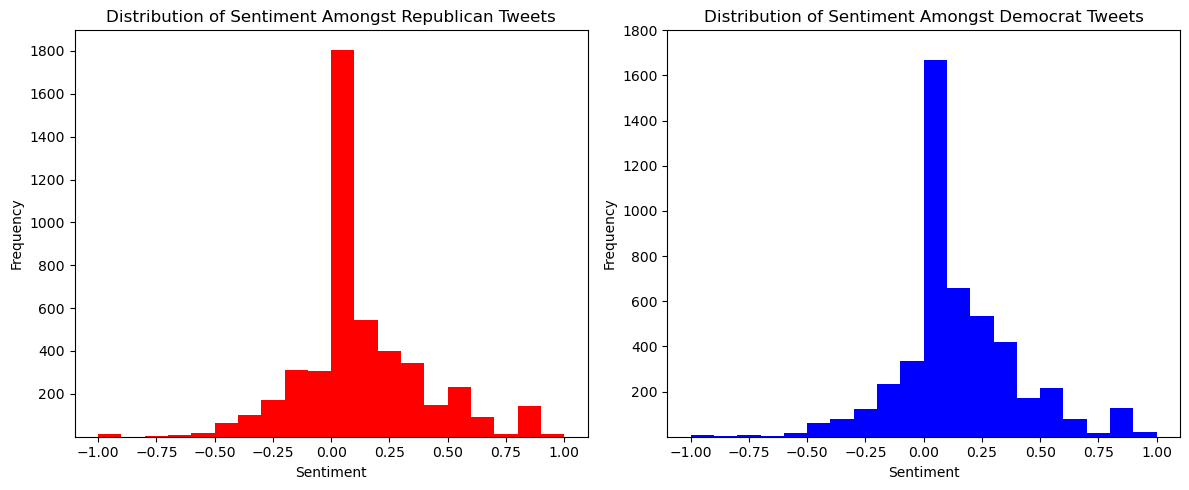

In [10]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for Republican Tweets
rep_df = sentiment.loc[sentiment['party'] == 'R', ]
rep_ax = rep_df['sentiment'].plot(kind='hist', bins=20, color='red', ax=axes[0])
rep_ax.set_xlabel('Sentiment')
rep_ax.set_ylabel('Frequency')
rep_ax.set_title('Distribution of Sentiment Amongst Republican Tweets')

# Plot for Democrat Tweets
dem_df = sentiment.loc[sentiment['party'] == 'D', ]
dem_ax = dem_df['sentiment'].plot(kind='hist', bins=20, color='blue', ax=axes[1])
dem_ax.set_xlabel('Sentiment')
dem_ax.set_ylabel('Frequency')
dem_ax.set_title('Distribution of Sentiment Amongst Democrat Tweets')

# Set common y-axis range
common_y_ticks = range(200, 1801, 200)
for ax in axes:
    ax.set_yticks(common_y_ticks)

# Adjust layout
plt.tight_layout()

#### Average overall sentiment grouped by party

**0** for republican

**1** for democrat

In [11]:
def average_sentiment_by_party(df):
    df['sentiment'] = df['clean_tweet'].apply(lambda x: TextBlob(x).sentiment[0])
    average_sentiments = df.groupby('is_democrat')['sentiment'].mean()
    return average_sentiments

# Call the function
average_sentiments_by_party = average_sentiment_by_party(df_cleaned)

# Print the result
print(average_sentiments_by_party)

is_democrat
0    0.114399
1    0.134971
Name: sentiment, dtype: float64


#### Top words indicating positive and negative sentiment for each party

In [12]:
import nltk

# Downloads
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')

# Other nltk modules
from nltk.corpus import stopwords
import nltk as nlp
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words

import pickle

# Define  customized stopwords
stopwords = stopwords.words('english')
stopwords.extend(["rt", "u", "r", "amp", "w", "th"])  # Add additional stopwords

# remove some stopwords
stopwords.remove('not')
stopwords.remove('is')
stopwords.remove('against')
stopwords.remove("don't")
stopwords.remove("have")
stopwords.remove("won't")

len(stopwords)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\erick\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erick\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\erick\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erick\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [13]:
## Vectorizers
from sklearn.feature_extraction.text import CountVectorizer


In [14]:
def top_words_by_sentiment(df, party_value, sentiment_threshold=0):
    party_tweets = df[df['is_democrat'] == party_value]
    positive_tweets = party_tweets[party_tweets['sentiment'] > sentiment_threshold]
    negative_tweets = party_tweets[party_tweets['sentiment'] < -sentiment_threshold]
    
    vectorizer = CountVectorizer(stop_words=stopwords, ngram_range = (1,3))
    
    # Positive Words
    positive_words = vectorizer.fit_transform(positive_tweets['clean_tweet'])
    positive_words_sum = positive_words.sum(axis=0)
    positive_words_freq = [(word, positive_words_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    positive_words_freq = sorted(positive_words_freq, key=lambda x: x[1], reverse=True)[:20]

    # Negative Words
    negative_words = vectorizer.fit_transform(negative_tweets['clean_tweet'])
    negative_words_sum = negative_words.sum(axis=0)
    negative_words_freq = [(word, negative_words_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    negative_words_freq = sorted(negative_words_freq, key=lambda x: x[1], reverse=True)[:20]

    return positive_words_freq, negative_words_freq

# Call the function for Democrats (is_democrat = 1)
positive_words_dem, negative_words_dem = top_words_by_sentiment(df_cleaned, 1)

# Print the results
print("Top positive words for Democrats:")
print(positive_words_dem)

print("\nTop negative words for Democrats:")
print(negative_words_dem)

# Call the function for Republicans (is_democrat = 0)
positive_words_rep, negative_words_rep = top_words_by_sentiment(df_cleaned, 0)

# Print the results
print("\nTop positive words for Republicans:")
print(positive_words_rep)

print("\nTop negative words for Republicans:")
print(negative_words_rep)

Top positive words for Democrats:
[('co', 2284), ('right', 462), ('today', 450), ('year', 435), ('have', 393), ('community', 365), ('work', 324), ('american', 317), ('new', 295), ('family', 284), ('health', 271), ('care', 268), ('woman', 267), ('day', 267), ('not', 261), ('need', 253), ('proud', 244), ('abortion', 224), ('congress', 220), ('make', 218)]

Top negative words for Democrats:
[('co', 586), ('republican', 144), ('not', 143), ('family', 143), ('year', 126), ('today', 115), ('have', 114), ('american', 103), ('woman', 100), ('house', 94), ('day', 90), ('must', 90), ('need', 90), ('community', 79), ('people', 77), ('government', 74), ('one', 74), ('million', 72), ('congress', 71), ('center', 70)]

Top positive words for Republicans:
[('co', 2121), ('life', 395), ('have', 375), ('border', 356), ('today', 325), ('american', 309), ('proud', 287), ('biden', 279), ('not', 275), ('right', 242), ('family', 234), ('great', 217), ('day', 206), ('community', 205), ('year', 200), ('new', 1

#### Visualize top words indicating positive and negative sentiment for each party

In [15]:
# Plotting Top 15 Words for Sentiment
def plot_top_words(words_freq, party_name, sentiment_type, color):
    words, freq = zip(*words_freq)
    plt.figure(figsize=(15, 5))
    plt.bar(words, freq, color=color)
    plt.title(f"Top 20 {sentiment_type} Words for {party_name}")
    plt.xlabel("Frequency")
    plt.xticks(rotation=45)
    plt.ylabel("Words")
    

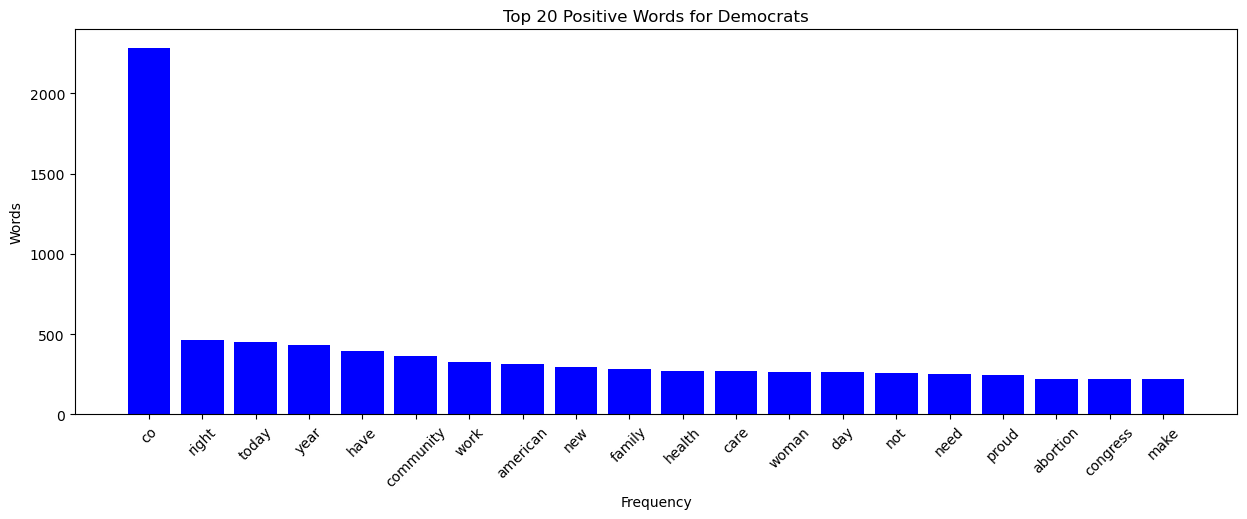

In [16]:
# Plot Top Words for Democrats indicating positive sentiment
plot_top_words(positive_words_dem, "Democrats", "Positive", 'blue')


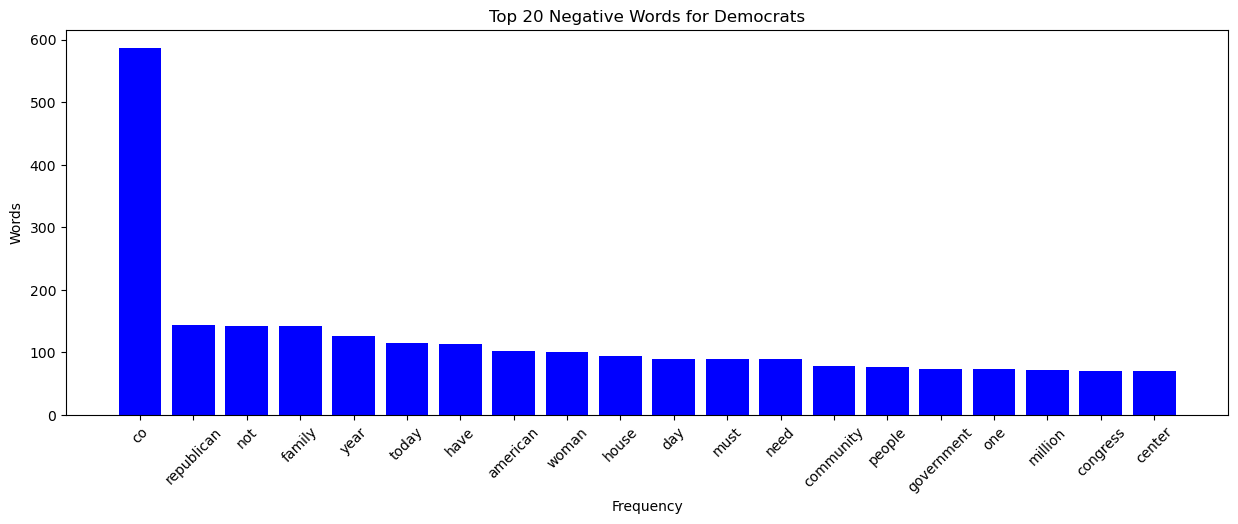

In [17]:
# Plot Top Words for Democrats indicating negaive sentiment
plot_top_words(negative_words_dem, "Democrats", "Negative",'blue')



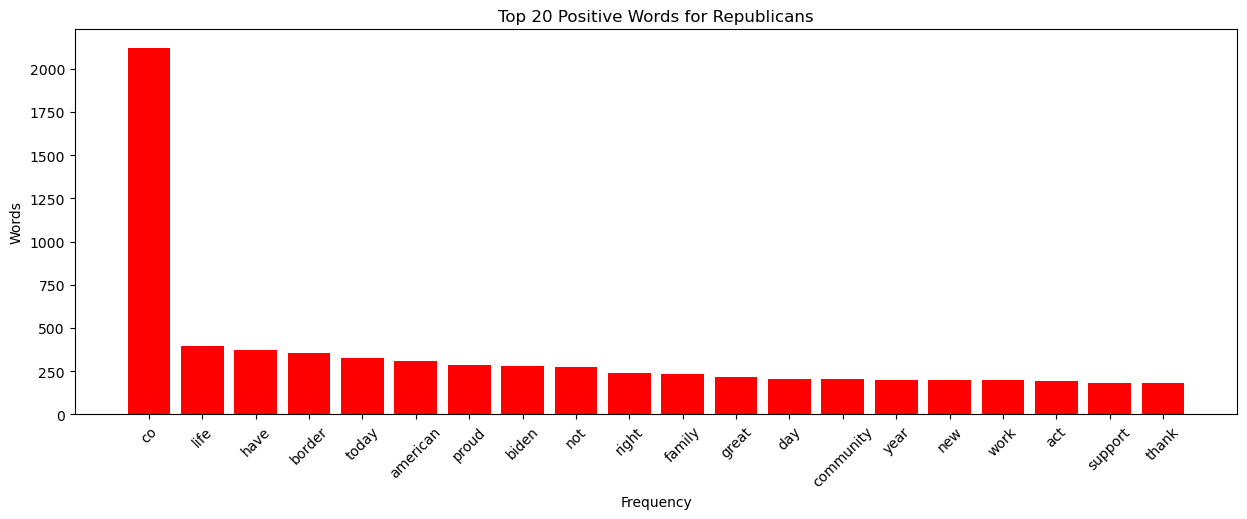

In [18]:
# Plot Top Words for Republicans indicating positive sentiment
plot_top_words(positive_words_rep, "Republicans", "Positive", "red")


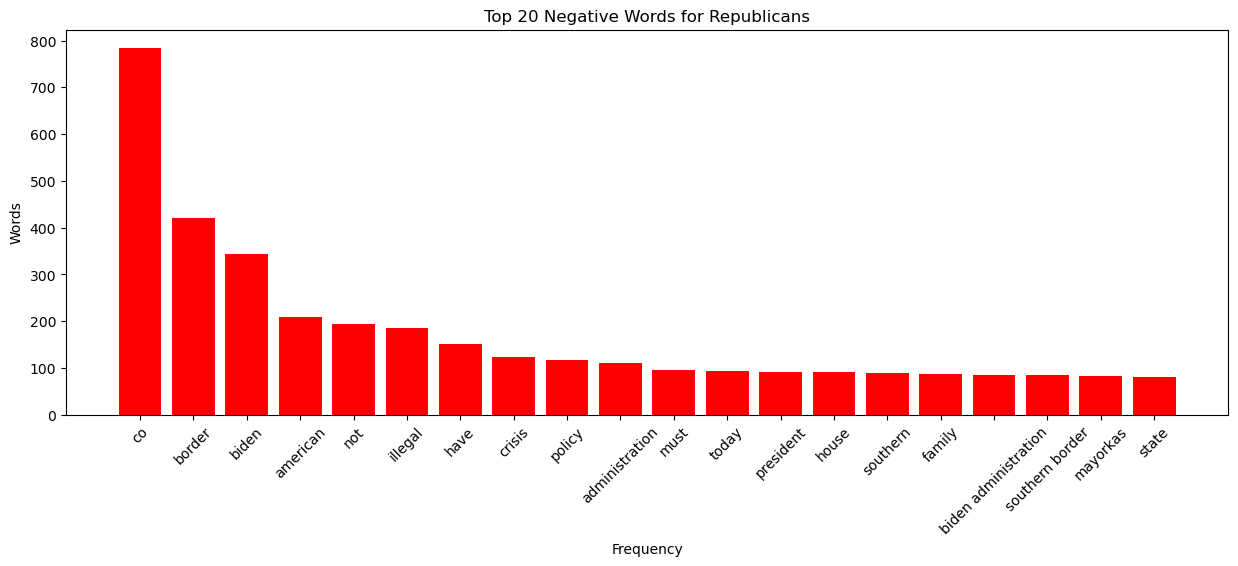

In [19]:
#Plot Top Words for Republicans indicating negative sentiment
plot_top_words(negative_words_rep, "Republicans", "Negative", "red")

#### WordClouds for Positive and Negative Tweets

In [20]:
# Word Cloud
!pip install wordcloud
from wordcloud import WordCloud


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
# Word Cloud for Positive Tweets with Party Colors
def generate_combined_word_cloud(positive_tweets_dem, positive_tweets_rep, title):
    combined_text_dem = " ".join(positive_tweets_dem.split())
    combined_text_rep = " ".join(positive_tweets_rep.split())

    wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap='bwr').generate(combined_text_dem + combined_text_rep)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

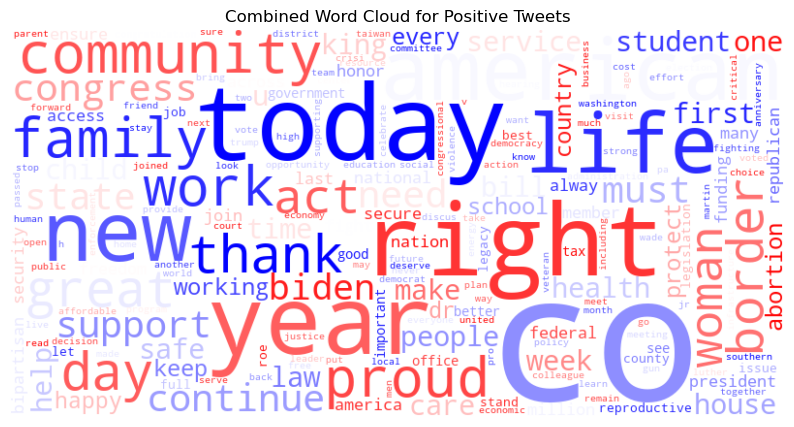

In [22]:
# Combine positive tweets for Democrats and Republicans
positive_tweets_dem = " ".join(df_cleaned[(df_cleaned['is_democrat'] == 1) & (df_cleaned['sentiment'] > 0)]['clean_tweet'])
positive_tweets_rep = " ".join(df_cleaned[(df_cleaned['is_democrat'] == 0) & (df_cleaned['sentiment'] > 0)]['clean_tweet'])

# Generate Combined Word Cloud for Positive Tweets
generate_combined_word_cloud(positive_tweets_dem, positive_tweets_rep, "Combined Word Cloud for Positive Tweets")


In [23]:
# Word Cloud for Negative Tweets with Party Colors
def generate_combined_word_cloud(negative_tweets_dem, negative_tweets_rep, title):
    combined_text_dem = " ".join(negative_tweets_dem.split())
    combined_text_rep = " ".join(negative_tweets_rep.split())

    wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap='bwr').generate(combined_text_dem + combined_text_rep)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

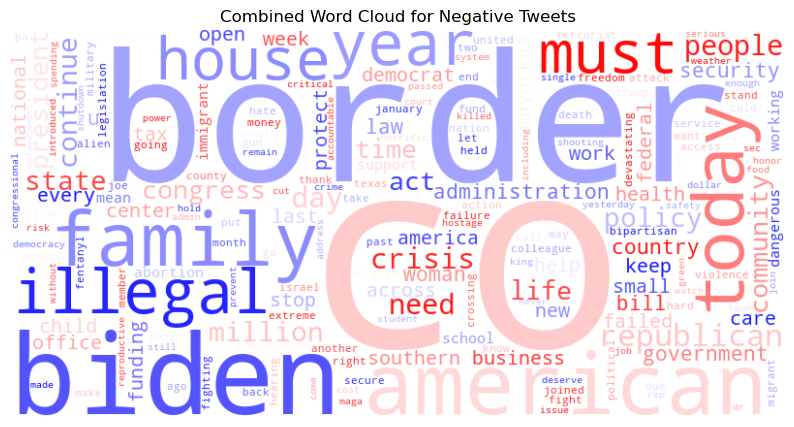

In [24]:
# Combine negative tweets for Democrats and Republicans
negative_tweets_dem = " ".join(df_cleaned[(df_cleaned['is_democrat'] == 1) & (df_cleaned['sentiment'] < 0)]['clean_tweet'])
negative_tweets_rep = " ".join(df_cleaned[(df_cleaned['is_democrat'] == 0) & (df_cleaned['sentiment'] < 0)]['clean_tweet'])

# Generate Combined Word Cloud for Negative Tweets
generate_combined_word_cloud(negative_tweets_dem, negative_tweets_rep, "Combined Word Cloud for Negative Tweets")

## 5. Hypothesis Testing

A t-test will be performed to determine if there are statistically significant differences between the sentiment in the tweets from Democrats and Republicans

The null hypothesis (H0) is that there is no difference in sentiment between Democrats and Republicans. If the p-value is less than 0.05, you can reject the null hypothesis and conclude that there is a statistically significant difference.

In [26]:
from scipy.stats import ttest_ind

# Extract sentiment scores for Democrats and Republicans
dem_sentiment = sentiment.loc[sentiment['party'] == 'D', 'sentiment']
rep_sentiment = sentiment.loc[sentiment['party'] == 'R', 'sentiment']

# Perform t-test
t_statistic, p_value = ttest_ind(dem_sentiment, rep_sentiment, equal_var=False)

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')


T-statistic: 3.8068794142234212
P-value: 0.00014161663912532288


In [27]:
# Check for statistical significance (common threshold is 0.05)
if p_value < 0.05:
    print("There is a statistically significant difference in sentiment between Democrats and Republicans.")
else:
    print("There is no statistically significant difference in sentiment between Democrats and Republicans.")


There is a statistically significant difference in sentiment between Democrats and Republicans.


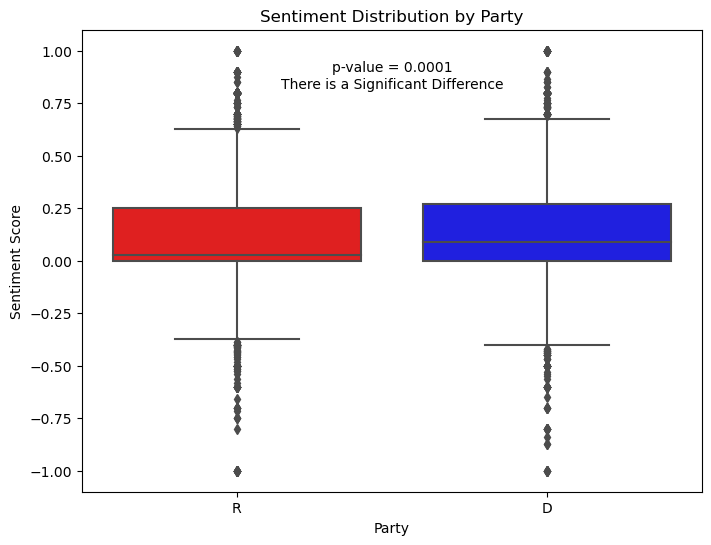

In [28]:
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='party', y='sentiment', data=sentiment, palette=['red', 'blue'])
plt.title('Sentiment Distribution by Party')
plt.xlabel('Party')
plt.ylabel('Sentiment Score')

# Add significance level if p-value is less than 0.05
if p_value < 0.05:
    plt.text(0.5, 0.9, f'p-value = {p_value:.4f}\nThere is a Significant Difference', 
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Project Conclusion

In this exploration of political discourse on social media, the objective was to uncover insights into the dynamics of political discussions. Here's a summary of our key findings:

### **Data Overview**

I independently curated the dataset by personally leveraging the Twitter API V2 for scraping. This hands-on approach ensured meticulous control over the data collection process, allowing for a customized and targeted dataset tailored to the specific requirements of our analysis.

The value of this approach lies in the firsthand understanding and insights gained during the data collection. By personally overseeing the scraping process, I acquired in-depth knowledge about potential biases, nuances, and intricacies within the dataset. This level of involvement enhances the credibility and reliability of our findings, as the data is not only relevant to our research questions but also reflects a conscious and informed collection process.

The dataset comprised political tweets covering diverse topics and sentiments. Through Exploratory Data Analysis (EDA) and Feature Engineering, we introduced a "retweets" column and categorized hashtags into Democrat and Republican lists, providing valuable information for analysis.


### **Sentiment Analysis and Hypothesis Testing**

The sentiment analysis indicated a statistically significant difference in sentiment between Democrats and Republicans, with Democrats exhibiting slightly higher sentiment on average.

### **Conclusion and Implications**

My journey through political tweet analysis provided valuable insights into communication styles, party dynamics, and sentiment differences. The models, though exhibiting areas for improvement, serve as valuable tools for understanding and classifying tweets in the dynamic landscape of social media.

The intersection of language, sentiment, and political affiliation is complex, and my findings contribute to unraveling this complexity. As we navigate the evolving world of political discourse, the adaptability of our tweet classification model positions it as a versatile tool for comprehending the nuances of tweets.

In conclusion, this project exemplifies the power of data analysis in decoding the language of politics on social media, paving the way for deeper understanding and informed discussions.

### Further Steps

1. Streamlit
2. Time-based Analysis: Analyze sentiment trends over time: Collect timestamp of tweets.
3. Topic Modelling